<a href="https://colab.research.google.com/github/ranjithdurgunala/Data-Analytics-lab/blob/main/Lab_7_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA**

ARIMA stands for AutoRegressive Integrated Moving Average. It's a popular statistical model used for analyzing and forecasting time series data.

ARIMA combines three components:

**AR (AutoRegressive)** - Uses the relationship between an observation and a specified number of lagged observations (previous time points). The model assumes the current value depends on its own past values.

**I (Integrated)** - Involves differencing the data to make it stationary (removing trends or seasonality). This means subtracting previous observations from current ones to stabilize the mean.

**MA (Moving Average)** - Uses the relationship between an observation and a residual error from a moving average model applied to lagged observations. It models the error term as a linear combination of past error terms.

ARIMA models are typically written as ARIMA(p,d,q) where:

p = number of autoregressive terms
d = number of differences needed for stationarity
q = number of moving average terms

These models are widely used in economics, finance, weather forecasting, and any field where you need to predict future values based on historical patterns. They're particularly useful when your data shows trends or patterns over time but doesn't have strong seasonal components (though there's also SARIMA for seasonal data).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1) Load dataset
df = pd.read_csv("/content/time_series_data.csv")   # change filename as needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

print("First 5 records:")
print(df.head())


First 5 records:
             Value
Date              
2024-01-01   94.57
2024-01-02  105.30
2024-01-03  102.03
2024-01-04   93.40
2024-01-05   98.34


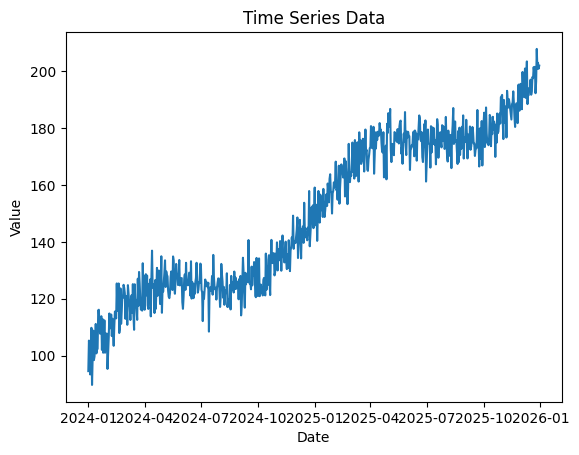

In [3]:
# 2) Plot the time series
plt.figure()
plt.plot(df.index, df["Value"])
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [4]:
# 3) Fit ARIMA model
# (p, d, q) = (1, 1, 1) is a common starting point
model = ARIMA(df["Value"], order=(1, 1, 1))
model_fit = model.fit()

print("\nARIMA Model Summary:")
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  730
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2250.968
Date:                Mon, 16 Feb 2026   AIC                           4507.936
Time:                        06:12:53   BIC                           4521.711
Sample:                    01-01-2024   HQIC                          4513.251
                         - 12-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0154      0.047     -0.327      0.744      -0.107       0.077
ma.L1         -0.8258      0.026    -31.848      0.000      -0.877      -0.775
sigma2        28.1065      1.5

In [5]:
# 4) Forecast next 10 time steps
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

print("\nForecasted Values:")
print(forecast)


Forecasted Values:
2025-12-31    200.185837
2026-01-01    200.212941
2026-01-02    200.212524
2026-01-03    200.212531
2026-01-04    200.212531
2026-01-05    200.212531
2026-01-06    200.212531
2026-01-07    200.212531
2026-01-08    200.212531
2026-01-09    200.212531
Freq: D, Name: predicted_mean, dtype: float64


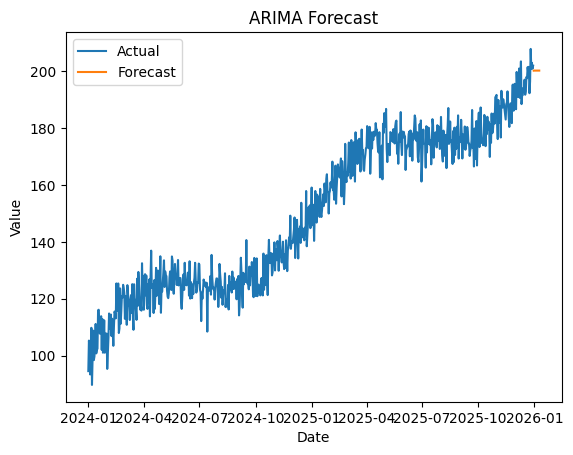

In [6]:
# 5) Plot actual vs forecast
plt.figure()
plt.plot(df.index, df["Value"], label="Actual")
plt.plot(forecast.index, forecast, label="Forecast")
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()